In [0]:
from google.colab import files

uploaded = files.upload()  

# Tesseract

In [0]:
!sudo apt install tesseract-ocr
!sudo apt install tesseract-ocr-spa
!sudo apt install libtesseract-dev

!pip install pytesseract
from PIL import Image
from pytesseract import image_to_string

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 6 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 6s (831 kB/s)
debconf: unable to initiali

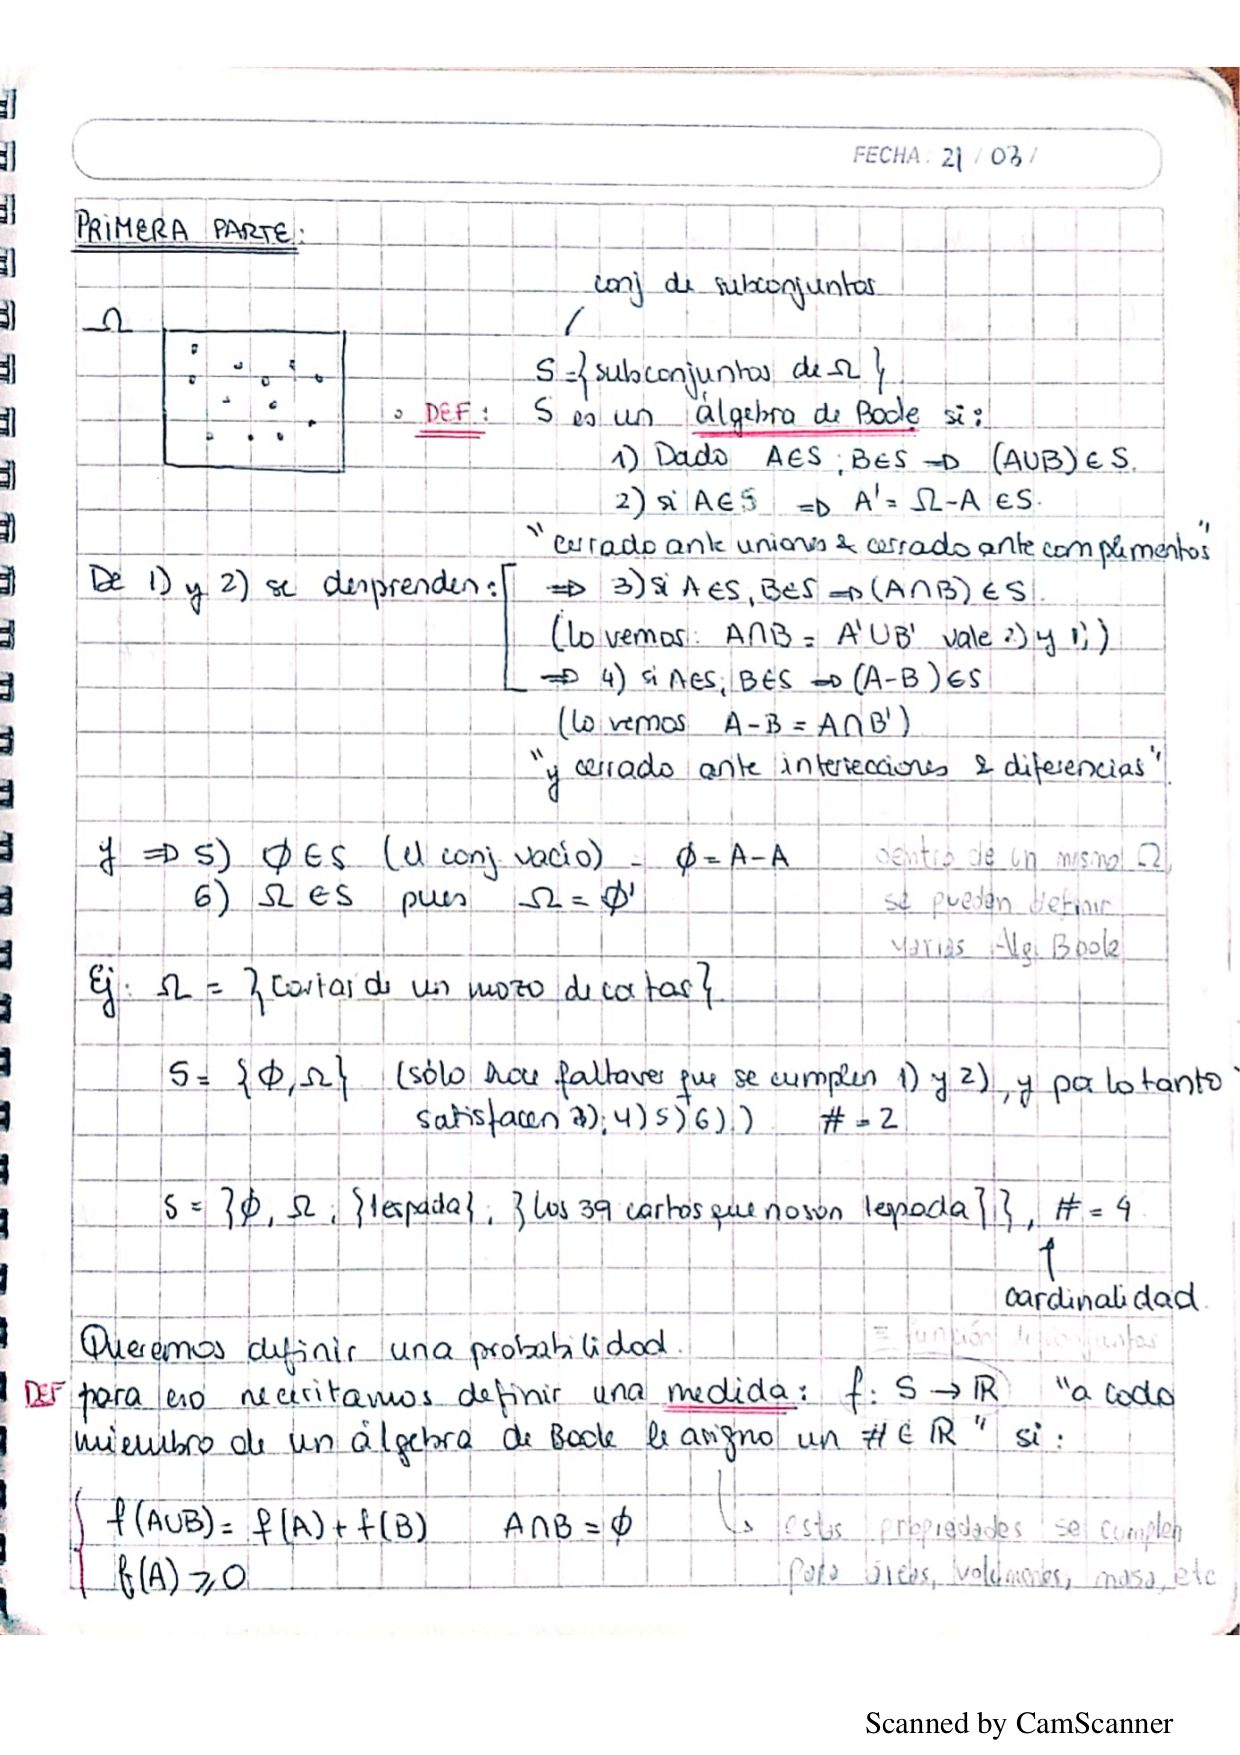

In [0]:
im = Image.open( 'carpeta_maru-1-1.png' )
# im = Image.open( 'example.jpeg' )
im
# print( image_to_string(im) )
# print( image_to_string(im, lang='eng') )

In [0]:
string = image_to_string( im, lang='spa' )
print( string )

Citi) — 49 de sauntr ol

Ss sulacenpanto ayi.
o Saun- Algrro de Pode slo
_d dado AES ¡BES —b _(AaUBdeESs.
 2)MRAIAES O =p Al= £L-A eS.
Ll jo errado Qnk una A urado ante corn plmentos
Poy Dx co => MES BES D(ANBD)ESI |

  
 

  

(lo: vemos: AND AUY vale dy 1)
Y to! => 4) anes BES > (A-B)es
to io, (louwvemos A-8=A08) , | | i
A 24 urada. ante ANECA dijes"

eo ld. (a Lom, o BA:
A ¡eS MN O

 

 

a E A ==  _ KÁ— ¡eno Él LALA

+ heal NI ,Gálo Ma ba qu Charito 10 a stato
Lis) O A

 

00 A E ——

os 1b,2 iba, ps 39 cts Noxon ada] mí MAN
Pip Ml boli ly L NN
L _ Cardinabdad

Quema bale una probala kde. L E
pora. leso aetsitamos delinic una. medida: 1: S>R "a todo

Walenabro ola. jun Lec _Qx Bock de asno un HERO Si:

| | |

E OA Fe He 0 Ike
A za l11 ib

   

Scanned by CamScanner


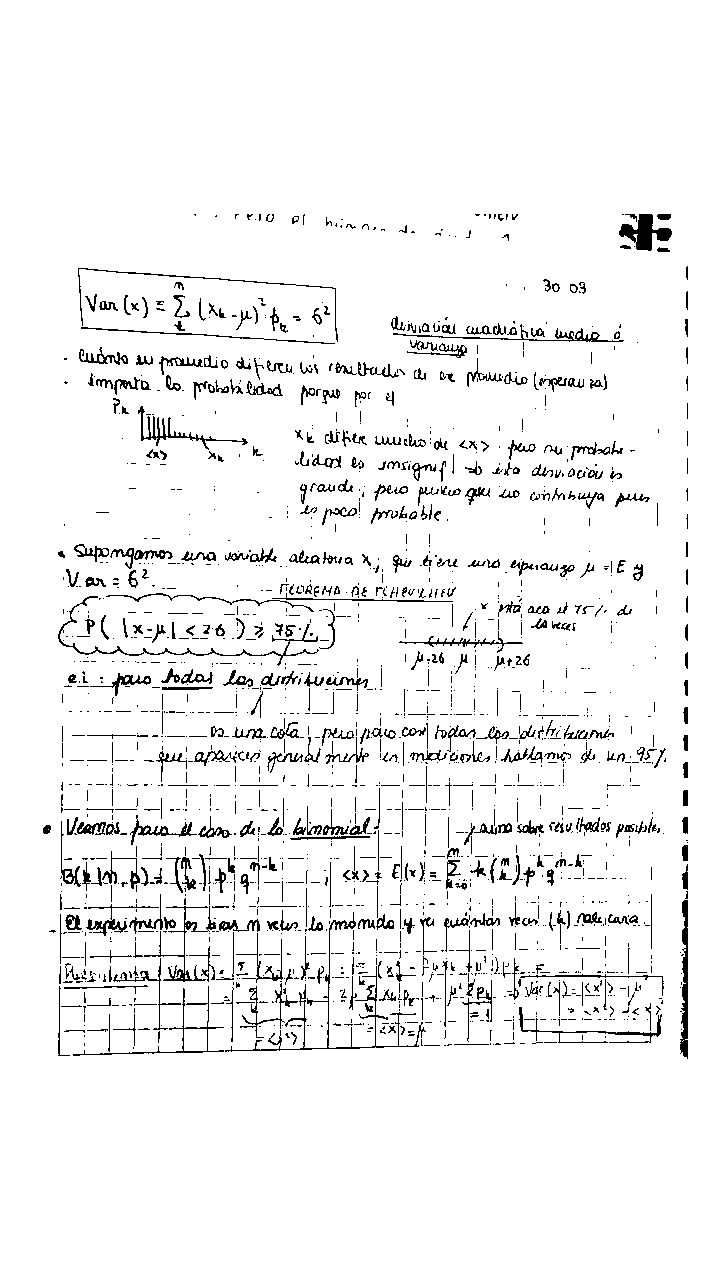

In [0]:
im2 = Image.open( 'example.png' )
im2

In [0]:
string2 = image_to_string( im2, lang='spa' )
print(string2)

== . 30.03
MO O ama om va ¿
AA Herueso 1 ! :

+ Budodo 24 prraclio tra ba bas
+ dmpato do pro aa porga par y

Pa IN] : e) !
Ml Me Bla aid > > 0 peak -

0 dida to sosgmpl b ¿do desgana, yo

o yrouda po pasto gua o chama pur
- - ¿Ae poco! prolia ble ' 1 |
- ! IN :
. Siemgomos una voalte atea boa so Ju kiere una tpacuzo po =1E y
Ven 2 6? a

= —Tivhema de reneonaeo : : 1
[AAA : X par dro de

os 1/7 | La veces

      
 
   

¡ Lp
O pl
con fo  tolatbi tatcarmdn Py
tacna d ln 4].
, na I z


# OpenCV2

In [0]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


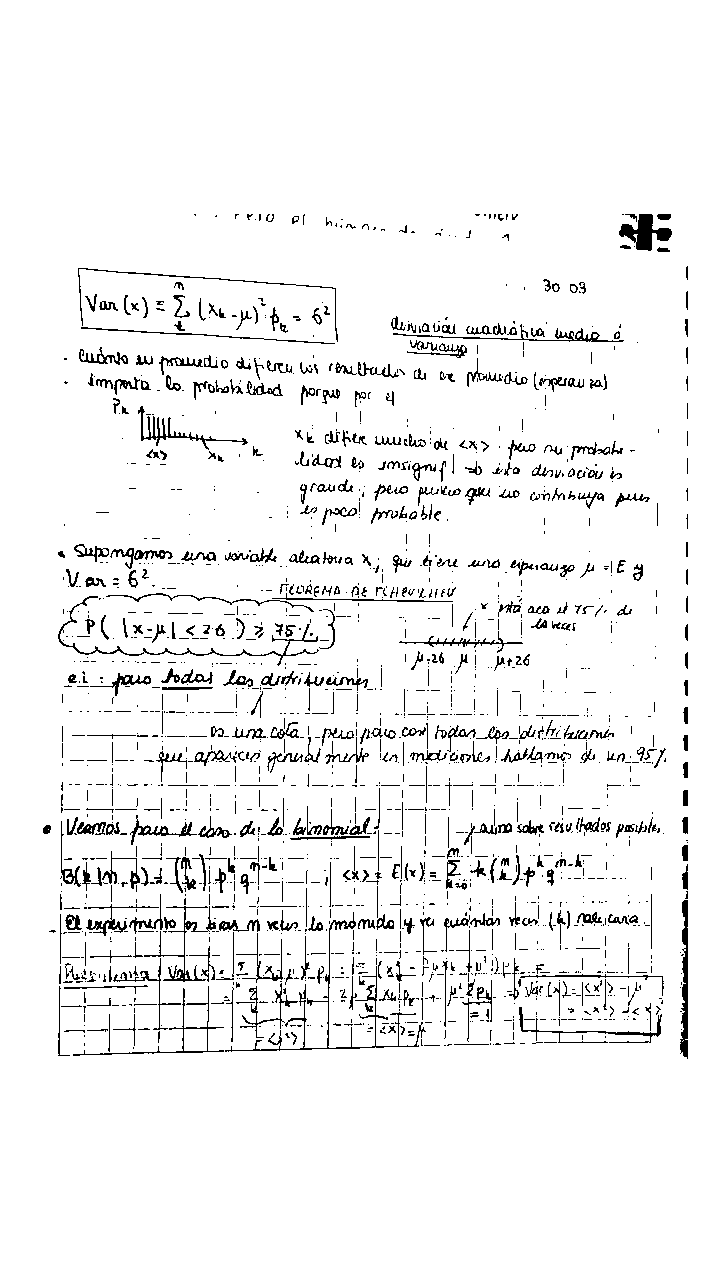

In [0]:
img = cv2.imread('example.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
Image.fromarray( gray )

In [0]:
# Now we split the image to 5000 cells, each 20x20 size
cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]

# Make it into a Numpy array. It size will be (50,100,20,20)
x = np.array(cells)

# Now we prepare train_data and test_data.
train = x[:,:50].reshape(-1,400).astype(np.float32) # Size = (2500,400)
test = x[:,50:100].reshape(-1,400).astype(np.float32) # Size = (2500,400)

# Create labels for train and test data
k = np.arange(10)
train_labels = np.repeat(k,250)[:,np.newaxis]
test_labels = train_labels.copy()

# Initiate kNN, train the data, then test it with test data for k=1
knn = cv2.KNearest()
knn.train(train,train_labels)
ret,result,neighbours,dist = knn.find_nearest(test,k=5)

# Now we check the accuracy of classification
# For that, compare the result with test_labels and check which are wrong
matches = result==test_labels
correct = np.count_nonzero(matches)
accuracy = correct*100.0/result.size
print accuracy